In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use('ggplot')

In [3]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [4]:
# dataset from https://github.com/sidooms/MovieTweetings
cols = ['user id', 'movie id', 'rate', 'ts']
ratings = pd.read_csv('dataset/ratings.dat.txt', sep='::', 
                      index_col=False, names=cols, encoding='utf8')

/Users/kris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [5]:
ratings[:5]

,user id,movie id,rate,ts
0,1,68646,10,1381620027
1,1,113277,10,1379466669
2,2,422720,8,1412178746
3,2,454876,8,1394818630
4,2,790636,7,1389963947


In [6]:
ratings['rate'].value_counts()

8     144125
7     133613
9      84679
6      77757
10     69018
5      42972
4      19212
3      10377
1       7138
2       6164
0        141
Name: rate, dtype: int64

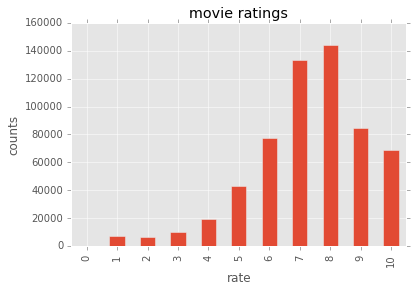

In [7]:
ratings['rate'].value_counts().sort_index().plot(kind='bar')
plt.title('movie ratings')
plt.ylabel('counts')
plt.xlabel('rate')


In [8]:
movies = pd.read_csv('dataset/movies.dat.txt', sep='::', 
                     index_col=False, names=['movie id', 'name', 'genre'], 
                     encoding='utf8')
movies[:5]

/Users/kris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,movie id,name,genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [9]:
drama = movies[movies['genre'] =='Crime|Drama']
drama[:5]

,movie id,name,genre
15,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
215,20859,Escape! (1930),Crime|Drama
229,21406,Sono yo no tsuma (1930),Crime|Drama
261,22286,The Public Enemy (1931),Crime|Drama
264,22403,Smart Money (1931),Crime|Drama


In [10]:
dramaIds = drama['movie id']
criterion = ratings['movie id'].map(lambda x: (dramaIds==x).any())
dramaRates = ratings[criterion]
dramaRates[:5]

,user id,movie id,rate,ts
0,1,68646,10,1381620027
50,15,68646,10,1486459236
51,15,71562,10,1486459311
52,15,99674,9,1486459399
104,27,111161,10,1405022004


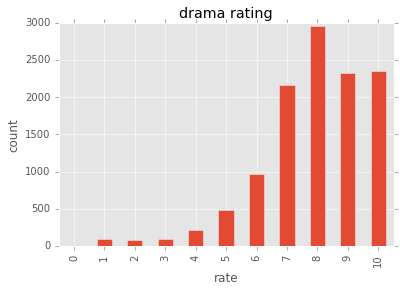

In [11]:
dramaRates['rate'].value_counts().sort_index().plot(kind='bar')
plt.title('drama rating')
plt.xlabel('rate')
plt.ylabel('count')

In [14]:
ratings.shape, movies.shape

((595196, 4), (27565, 3))